Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

**Disclaimer:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Use caution when interpreting the code or results.

## Overview of the Dandiset

This notebook explores Dandiset 001195, which contains data supporting the publication "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State" by Christopher R. Lee, Gillian A. Matthews, Mackenzie E. Lemieux, Elizabeth M. Wasserlein, Matilde Borio, Raymundo L. Miranda, Laurel R. Keyes, Gates P. Schneider, Caroline Jia, Andrea Tran, Faith Aloboudi, May G. Chan, Enzo Peroni, Grace S. Pereira, Alba L\u00f3pez-Moraga, Anna Pall\u00e9, Eyal Y. Kimchi, Nancy Padilla-Coreano, Romy Wichmann, Kay M. Tye.

The Dandiset is available at: https://dandiarchive.org/dandiset/001195

## Notebook Overview

This notebook will cover the following:

1.  Loading the Dandiset metadata using the DANDI API.
2.  Listing the assets (files) available in the Dandiset.
3.  Loading and visualizing data from an example NWB file.

## Required Packages

The following packages are required to run this notebook:

*   `dandi`
*   `pynwb`
*   `h5py`
*   `remfile`
*   `matplotlib`
*   `numpy`
*   `seaborn`

Assume that these are already installed on the user's system. Do not include any pip install commands in the notebook.

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001195")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733

Found 230 assets in the dataset

First 5 assets:
- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb


## Loading and Visualizing Data from an NWB File

This section demonstrates how to load and visualize data from an example NWB file in the Dandiset.

We will load the file: `sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb`

The URL for this asset is: `https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/`

In [2]:
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb = io.read()

# Print some metadata
print(f"Session description: {nwb.session_description}")
print(f"Experimenter: {nwb.experimenter}")
print(f"Subject ID: {nwb.subject.subject_id}")

Session description: episodic stimulation
Experimenter: ('Matthews, Gillian',)
Subject ID: 23


## Visualizing Current Clamp Response

This section shows how to load and visualize the current clamp response data from the NWB file.

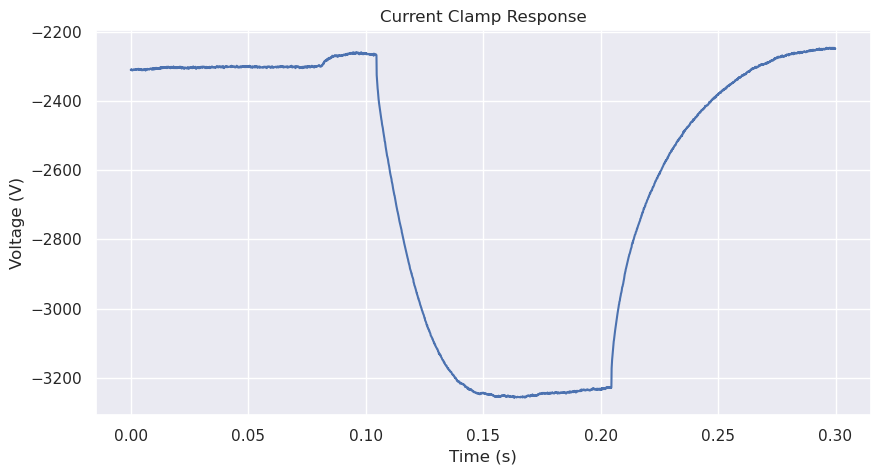

In [3]:
# Extract the data
data = nwb.acquisition["current_clamp-response-01-ch-0"].data[:]
timestamps = nwb.acquisition["current_clamp-response-01-ch-0"].timestamps
if timestamps is None:
    rate = nwb.acquisition["current_clamp-response-01-ch-0"].rate
    timestamps = np.arange(len(data)) / rate
else:
    timestamps = timestamps[:]

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(timestamps, data)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Current Clamp Response")
plt.show()

## Summary and Future Directions

This notebook demonstrated how to load and explore data from Dandiset 001195. We showed how to access the Dandiset metadata, list the available assets, and load and visualize data from an example NWB file.

Possible future directions for analysis include:

*   Exploring other NWB files in the Dandiset.
*   Analyzing the electrophysiology data to identify neuronal firing patterns.
*   Comparing the electrophysiology data with the behavioral videos to investigate correlations between neuronal activity and behavior.